In [135]:
%run /u/cmor/jupyter/HP_project/main.ipynb

In [136]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [140]:
gam

array([[ 0.0000e+00,  9.9994e-01,  0.0000e+00],
       [ 1.1100e+00,  8.5670e-01, -1.6764e-02],
       [ 2.2200e+00,  6.5740e-01, -2.7233e-02],
       ...,
       [ 1.4985e+03,  4.3950e-03, -4.9240e-03],
       [ 1.4996e+03,  4.3938e-03, -4.9240e-03],
       [ 1.5000e+03,  4.3934e-03, -4.9240e-03]])

/raven/u/cmor/jupyter/HP_project/data/LHD/surface


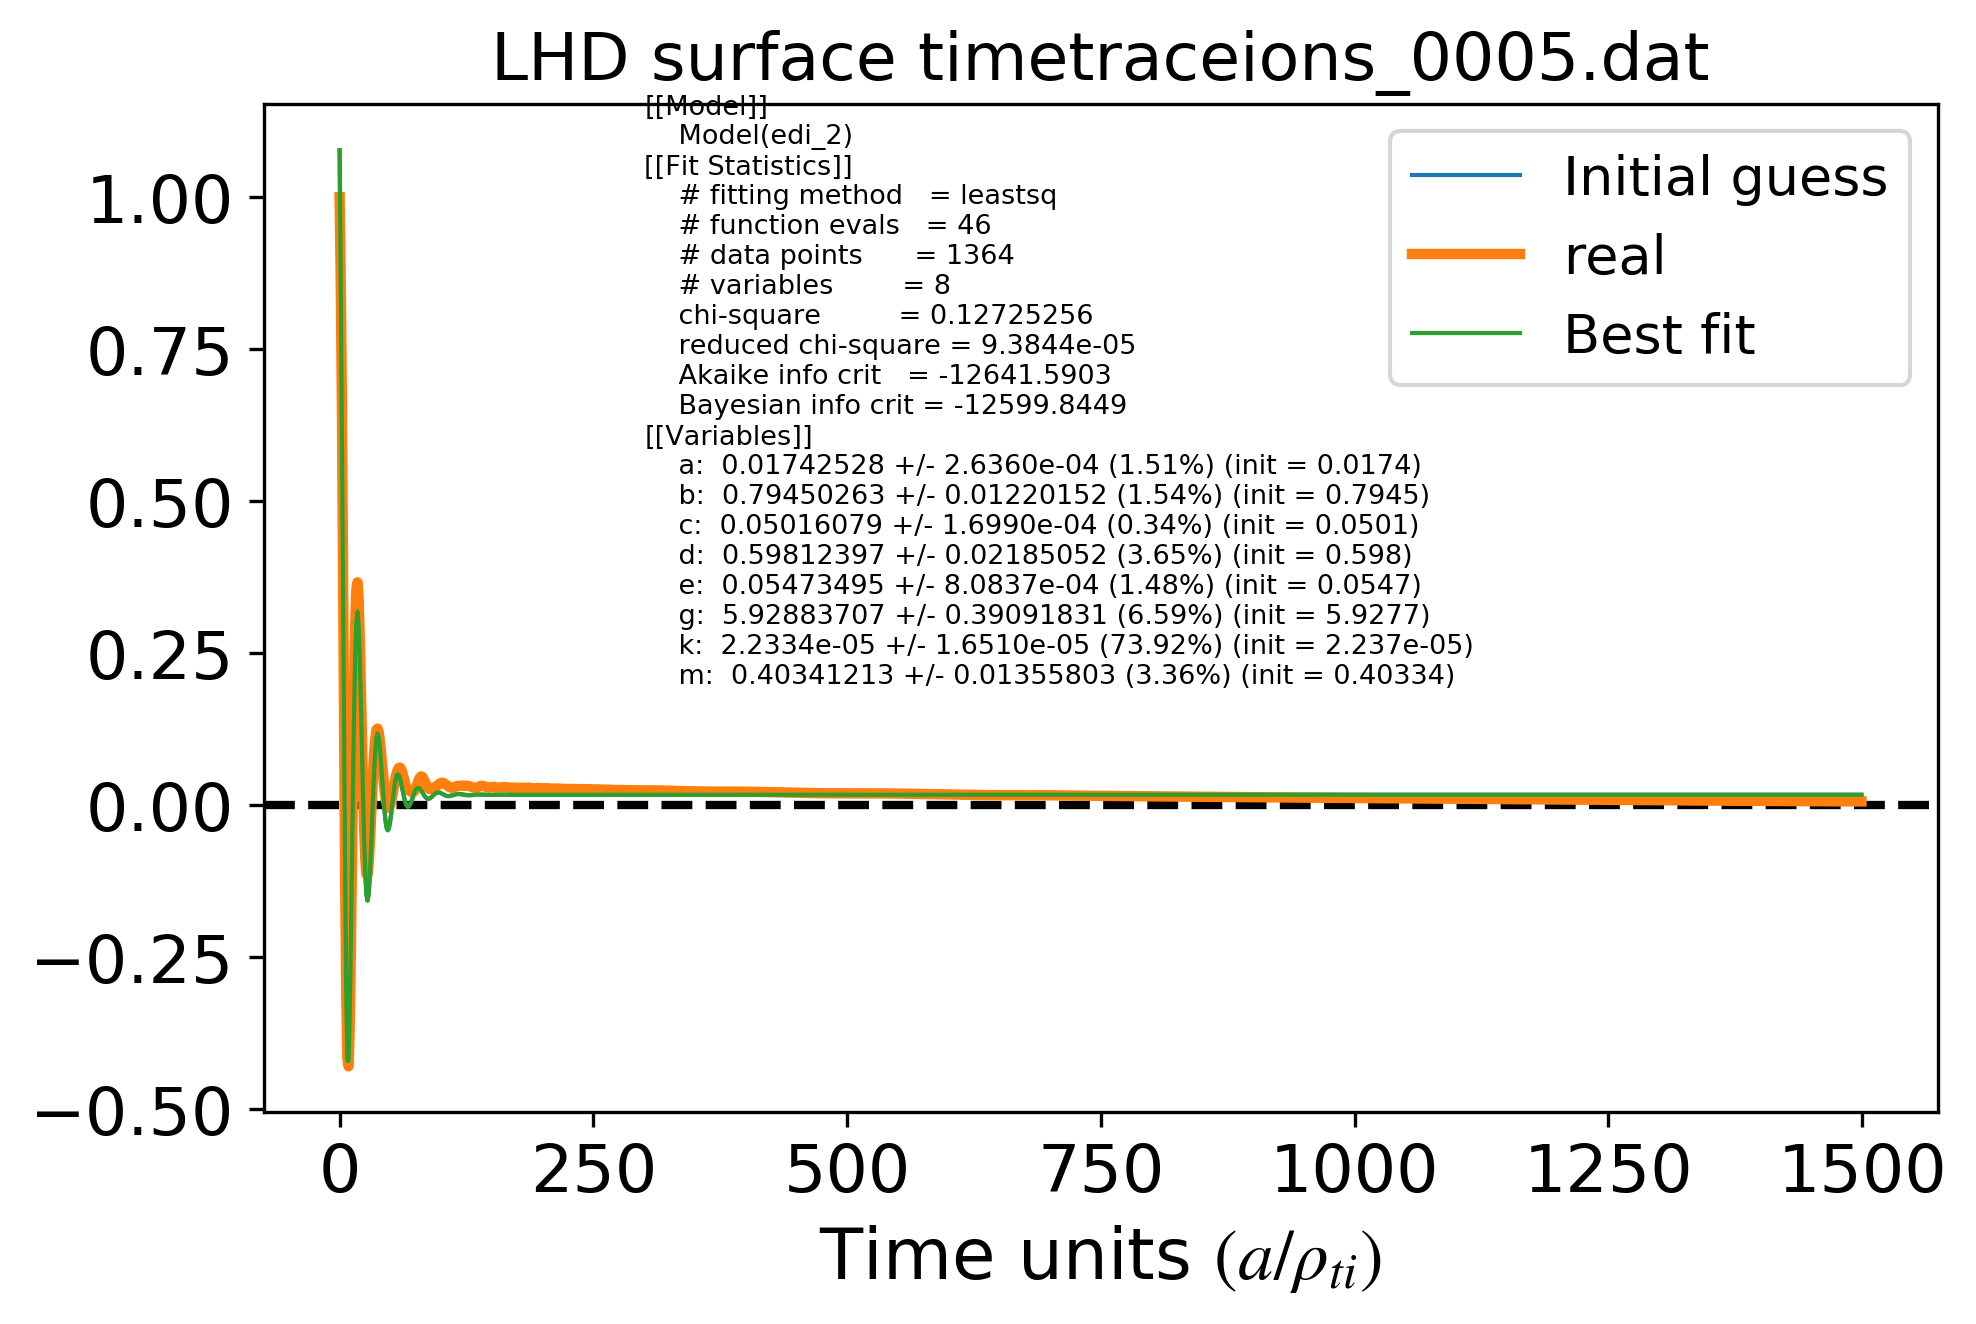

In [144]:
%cd /raven/u/cmor/jupyter/HP_project/data/LHD/surface
label   = "surface"
log = False
t0 = 0
tf = 1500
    
# Start plotting details, label and title
plt.figure()
plt.xlabel('Time units $(a/\\rho_{ti})$')
plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero

# End plotting details
flnm = "timetraceions_0005.dat"
gam = pylab.loadtxt("{0}".format(flnm))

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# Crop the time trace to the required values

if t0 != None:
    ini = (np.abs(t - t0)).argmin()
else:
    ini = (np.abs(t - t[0])).argmin()
if tf != None:
    fin = (np.abs(t - tf)).argmin()
else:
    fin = (np.abs(t - t[-1])).argmin()

y = a[ini:fin]
t = t[ini:fin]

a = 0.0174
b = 0.7945
c = 0.0501
d = 0.5980
e = 0.0547
g = 5.9277
k = 2.237e-5
m = 0.40334

gmodel = lmfit.Model(edi_2)

pars = Parameters()
pars.add('a', value=a)  # Residual
pars.add('b', value=b)
pars.add('c', value=c)
pars.add('d', value=d)
pars.add('e', value=e)  # decay
pars.add('g', value=g)
pars.add('k', value=k)
pars.add('m', value=m)


result = gmodel.fit(y, pars, t=t, nan_policy='propagate')

# print(result.fit_report(show_correl=False))

plt.plot(t, result.init_fit, label=r"Initial guess", linewidth=1)
plt.plot(t, y, label='real')
plt.plot(t, result.best_fit, linewidth=1, label=r"Best fit")
plt.title("LHD surface {0}".format(flnm))
# plt.ylim(ymax=1)
# plt.xlim(xmin=0)
plt.legend()

plt.text(300, 0.2, '{0}'.format(result.fit_report(show_correl=False)), fontsize=6.5)
plt.show()

r2 = 1 - result.residual.var() / np.var(y)

In [50]:
a=result.best_values.get('a')
b=result.best_values.get('b')
c=result.best_values.get('c')
d=result.best_values.get('d')
e=result.best_values.get('e')
g=result.best_values.get('g')
k=result.best_values.get('k')
m=result.best_values.get('m')

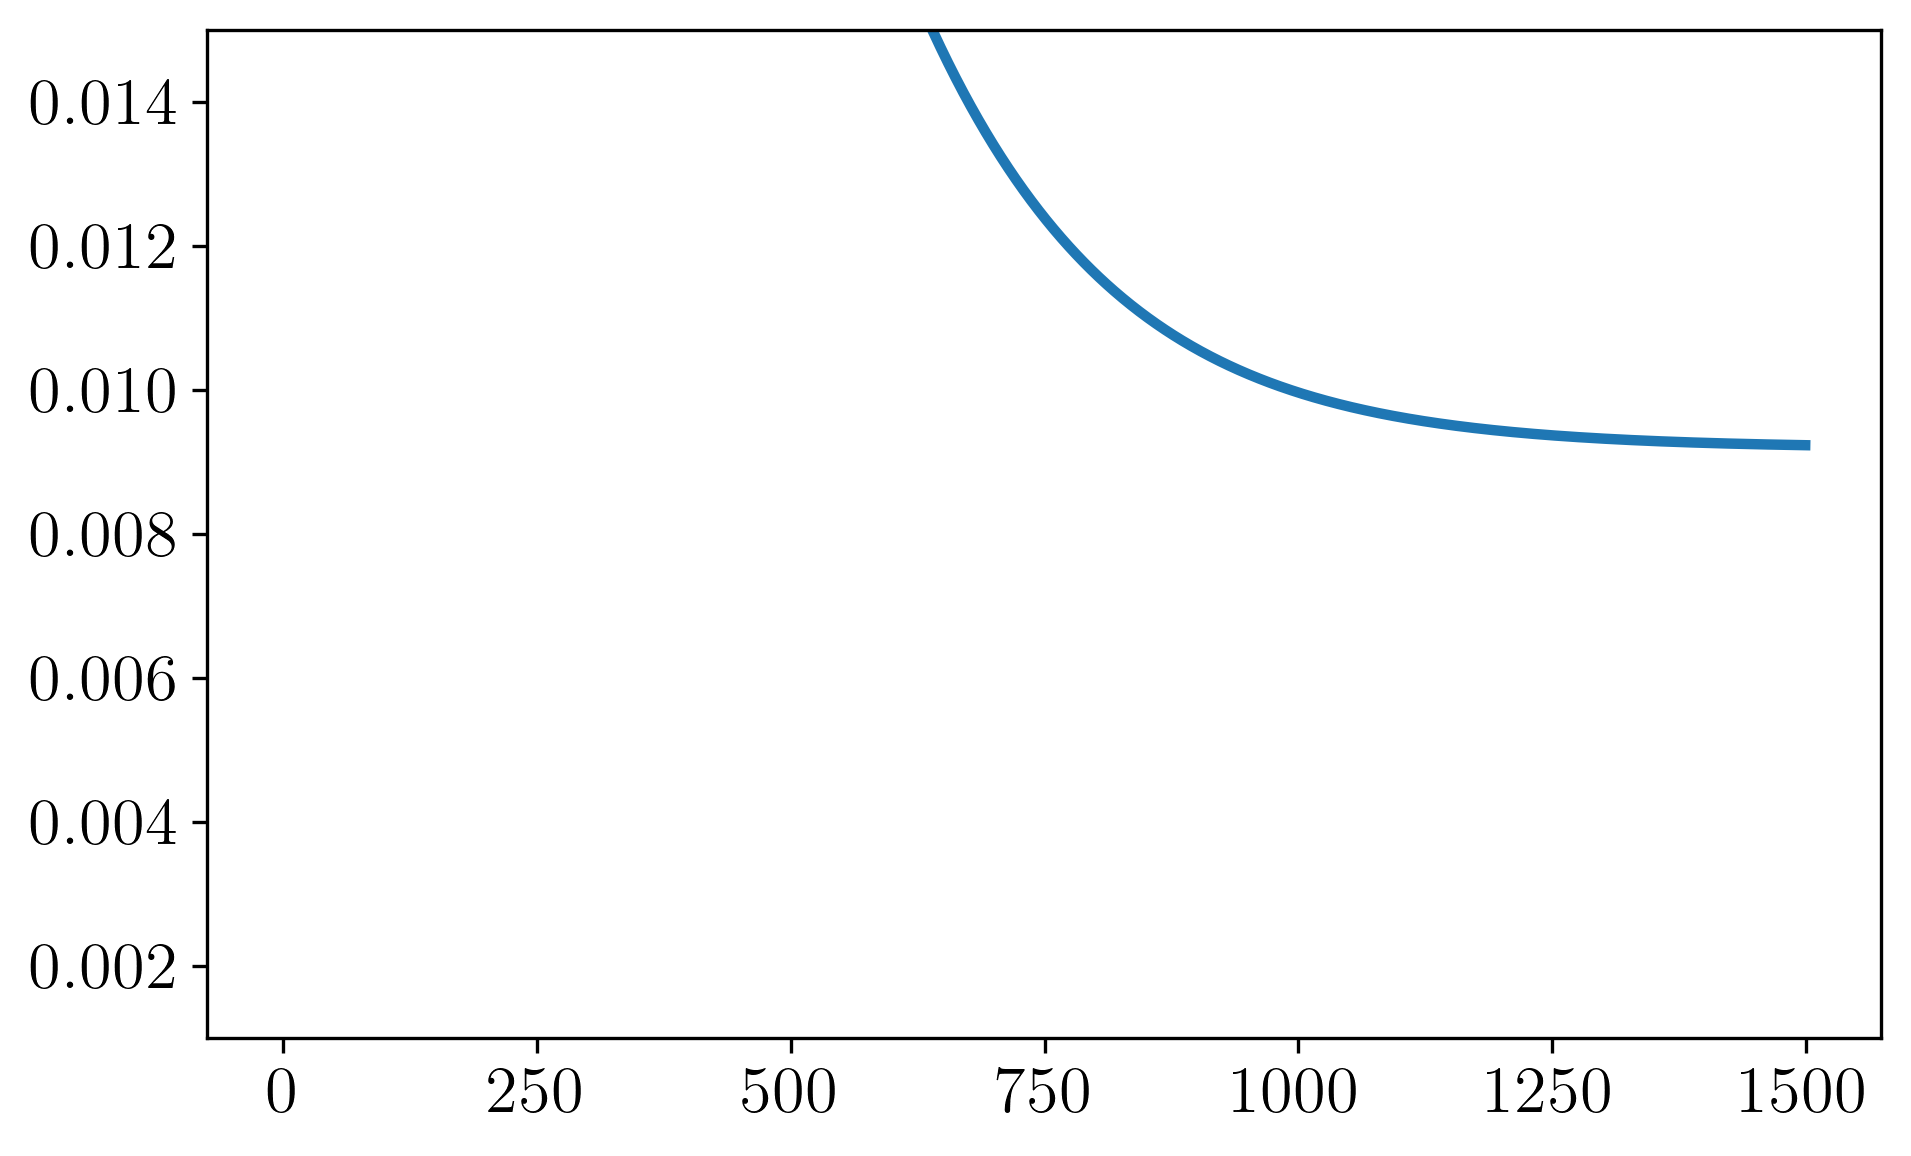

In [51]:
plt.figure()
plt.plot(t, edi_2(t, a, b, c, d, e, g, k, m))
plt.ylim(ymin=0.001, ymax=0.015)
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 301
    # variables        = 4
    chi-square         = 11.2182993
    reduced chi-square = 0.03777205
    Akaike info crit   = -982.158751
    Bayesian info crit = -967.330310
[[Variables]]
    amp:    5.00768275 +/- 0.03841329 (0.77%) (init = 10)
    decay:  0.02497233 +/- 4.3786e-04 (1.75%) (init = 0.1)
    shift: -0.09286553 +/- 0.00987011 (10.63%) (init = 0)
    omega:  1.99346052 +/- 0.00314845 (0.16%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.786
    C(amp, decay)   =  0.584
    C(amp, shift)   = -0.119


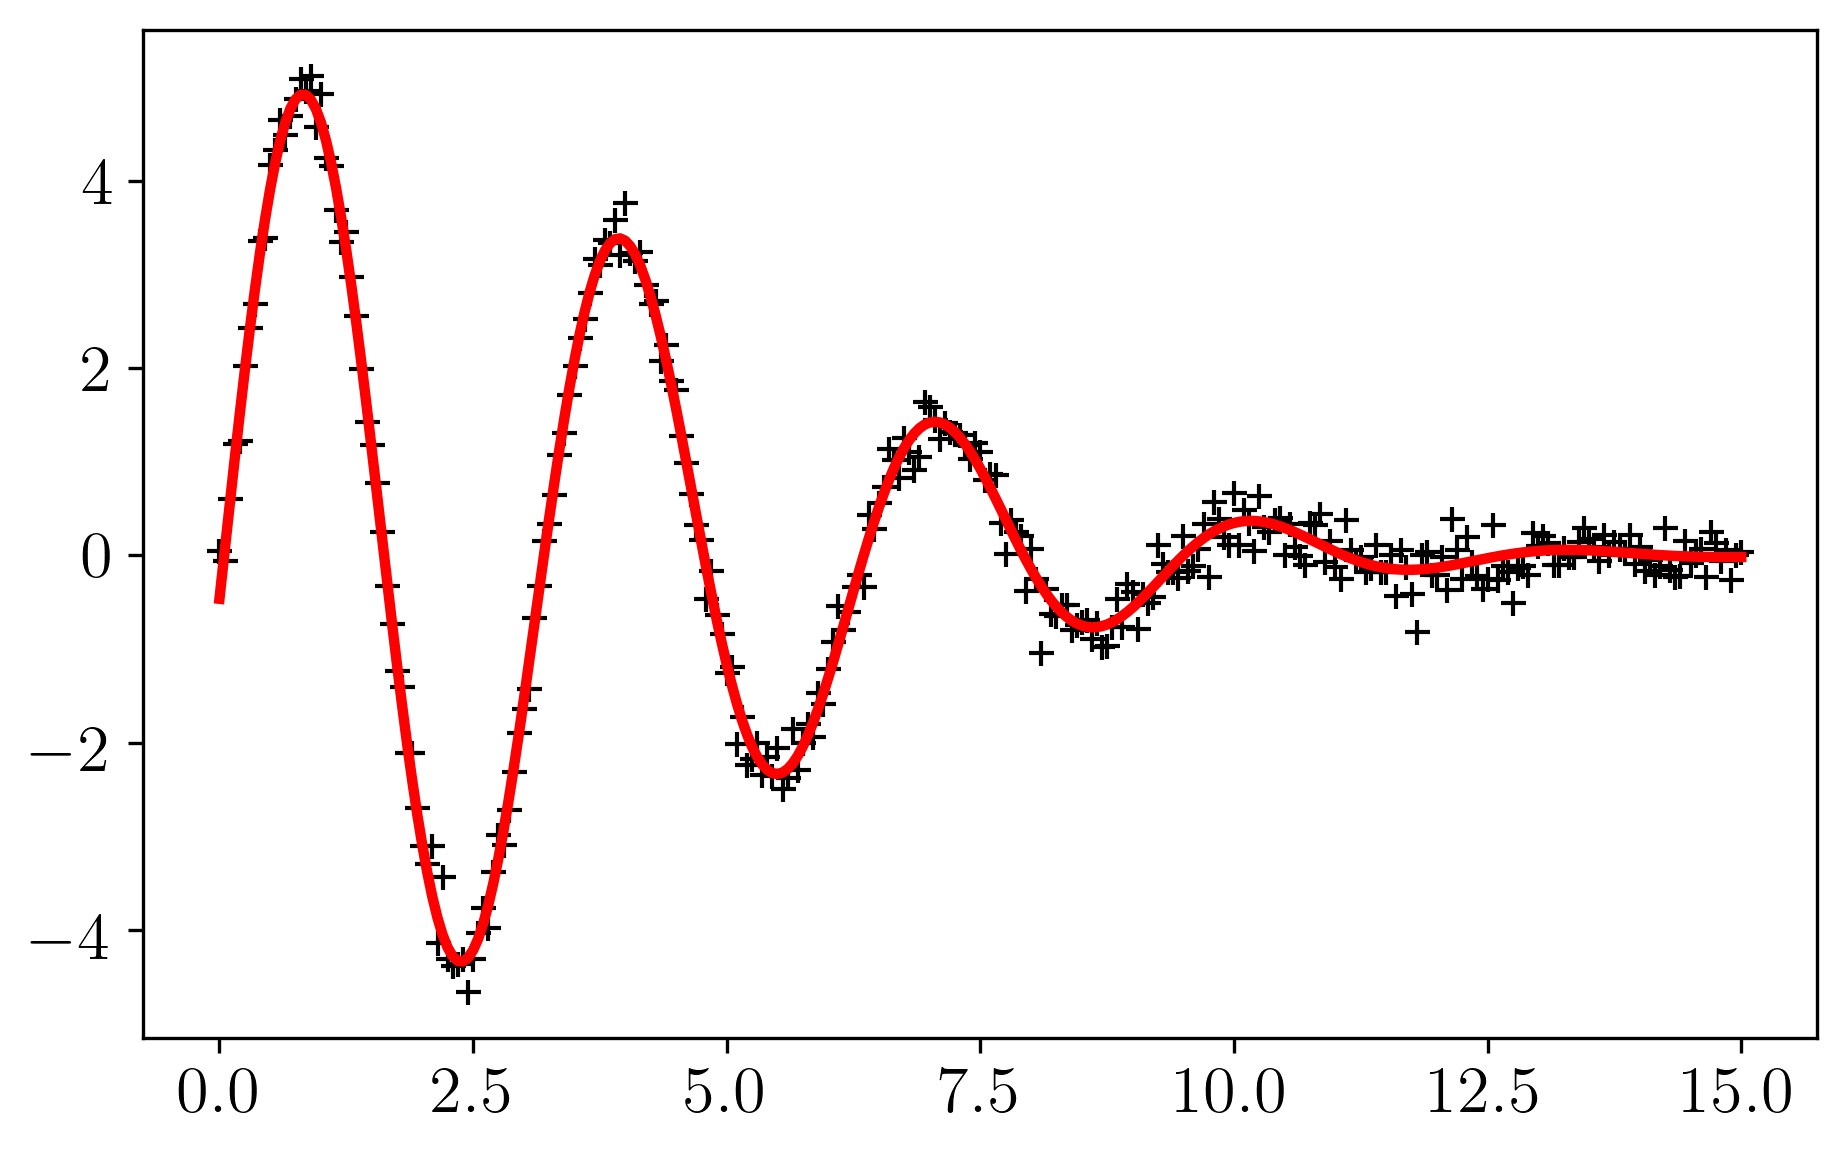

In [49]:
from lmfit import Minimizer, Parameters, report_fit

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5.0 * np.sin(2.0*x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=x.size, scale=0.2))


# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
params.add('omega', value=3.0)

# do fit, here with the default leastsq algorithm
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/alpha_0_npol_5
[[Model]]
    Model(edi_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5381
    # data points      = 1471
    # variables        = 8
    chi-square         = 0.04691213
    reduced chi-square = 3.2066e-05
    Akaike info crit   = -15213.5229
    Bayesian info crit = -15171.1733
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a: -0.01609554 +/- 0.00612280 (38.04%) (init = 0.0001)
    b:  1.73522198 +/-        nan (nan%) (init = 0.01)
    c:  3.8378e-10 +/- 7.3197e-06 (1907262.99%) (init = 1e-06)
    d:  1.24044913 +/-        nan (nan%) (init = -0.8)
    e:  3.0428e-04 +/-        nan (nan%) (init = -5e-05)
    g:  1.01270545 +/- 0.02198153 (2.17%) (init = 0.63)
    k:  0.23466970 +/- 0.01354006 (5.77%) (init = 0.008)
    m:  0.47644683 +/- 0.00583646 (1.22%) (init = 0.64)
[[Correlations]] (unreported correlations are < 0.100)
    C(g, k) = -0.891
    C(k, m) =  0.664
    C

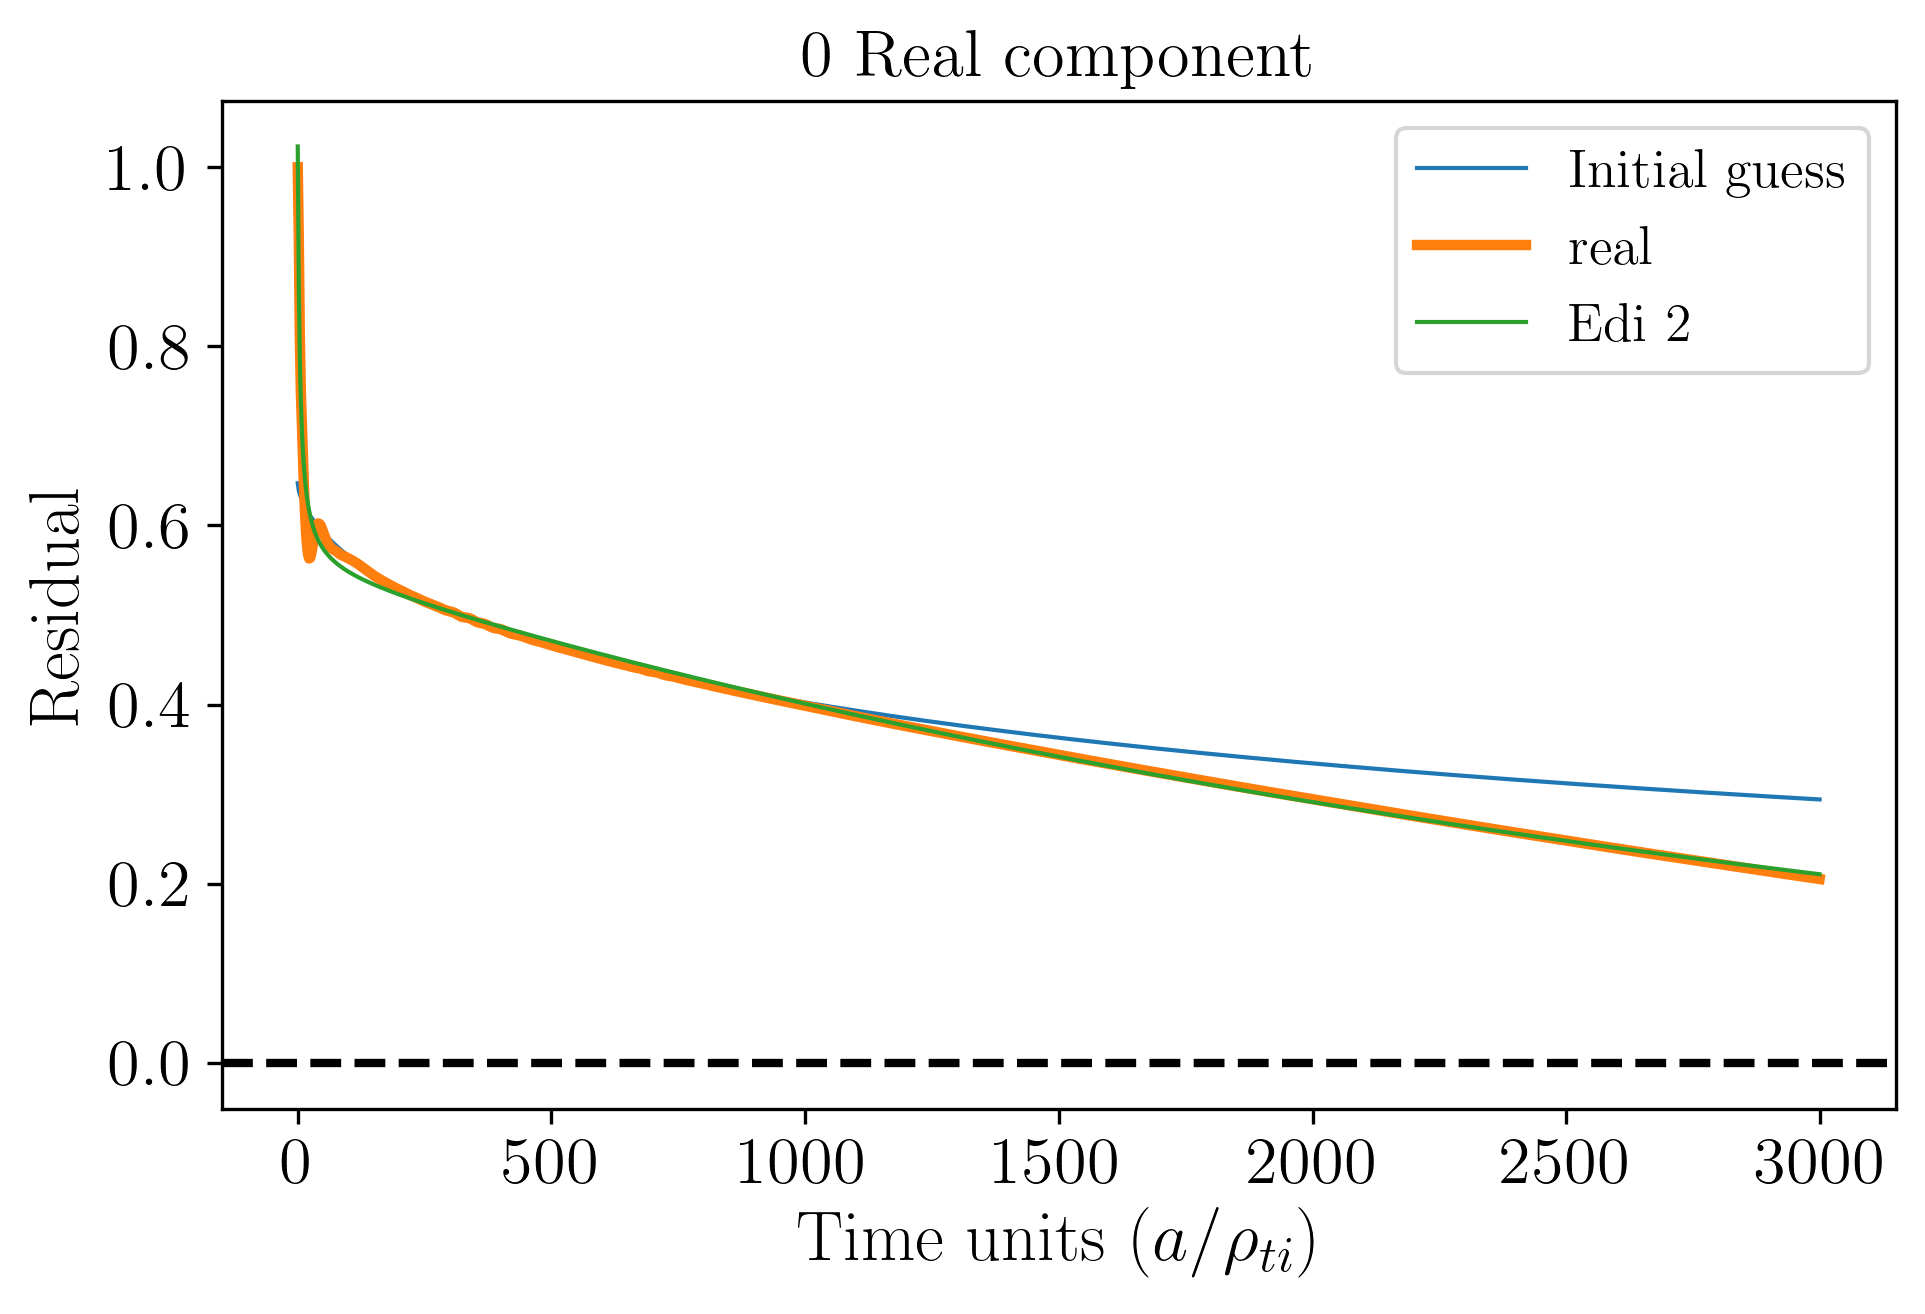

In [66]:
%cd /raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/alpha_0_npol_5
label   = "surface"
plot = 'real'
log = False
t0 = 0
tf = 5000
    
# Start plotting details, label and title
if plot != None:
    plt.figure()
    plt.xlabel('Time units $(a/\\rho_{ti})$')
    plt.ylabel(r"Residual")
    plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero
    if plot == 'real':  # Normally you choose the real component
        plt.title(r"{0} Real component")
    if plot == 'modulus':
        plt.title(r"{0} Modulus")

# End plotting details

all_r = []

gam = pylab.loadtxt("timetraceions_0031.dat")

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]),
              where=gam[0, 1] != 0)  # The real component
b = np.divide(gam[:, 2], gam[0, 1], out=np.zeros_like(gam[:, 2]),
              where=gam[0, 1] != 0)  # Imaginary component
E = np.sqrt(a**2 + b**2)  # Modulus

t = gam[:, 0]  # Time

if t0 != None:
    ini = (np.abs(t - t0)).argmin()
else:
    ini = (np.abs(t - t[0])).argmin()
if tf != None:
    fin = (np.abs(t - tf)).argmin()
else:
    fin = (np.abs(t - t[-1])).argmin()

mil = (np.abs(t - 500)).argmin()
all_r = np.append(all_r, a[mil])

t_orig = t
a_orig = a

a = a[ini:fin]
E = E[ini:fin]
t = t[ini:fin]

gmodel2 = lmfit.Model(edi_2)
pars2 = gmodel2.make_params(a=0.0001, b=0.01, c=0.000001, d=-0.8, e=-0.00005, m=0.64, g=0.63, k=0.008)
result2 = gmodel2.fit(a, pars2, t=t, nan_policy='propagate')
print(result2.fit_report())

if plot == 'real':
    if log == True:
        plt.yscale('log')
    plt.plot(t, result2.init_fit, label=r"Initial guess", linewidth=1)
#     plt.plot(t, result.best_fit, linewidth=2, label=r"Best fit")
    plt.plot(t, a, label='real')
#     plt.plot(t, result.best_fit, linewidth=1, label=r"GENE")
    plt.plot(t, result2.best_fit, linewidth=1, label=r"Edi 2")
#             plt.plot(t, gene_fit(t, A=A_sug, g=g_sug, w=w_sug, d=0), label="Sugama's")
#             plt.plot(t, gene_fit(t, A=A_gao, g=g_gao, w=w_gao, d=0), label="Gao's")
if plot == 'modulus':
    if log == True:
        plt.yscale('log')
    plt.plot(t, E, label='{0}'.format(label))  # , color=color))

if plot != None:
    plt.legend()
    plt.show()

In [44]:
result.chisqr

1.4446606438380694

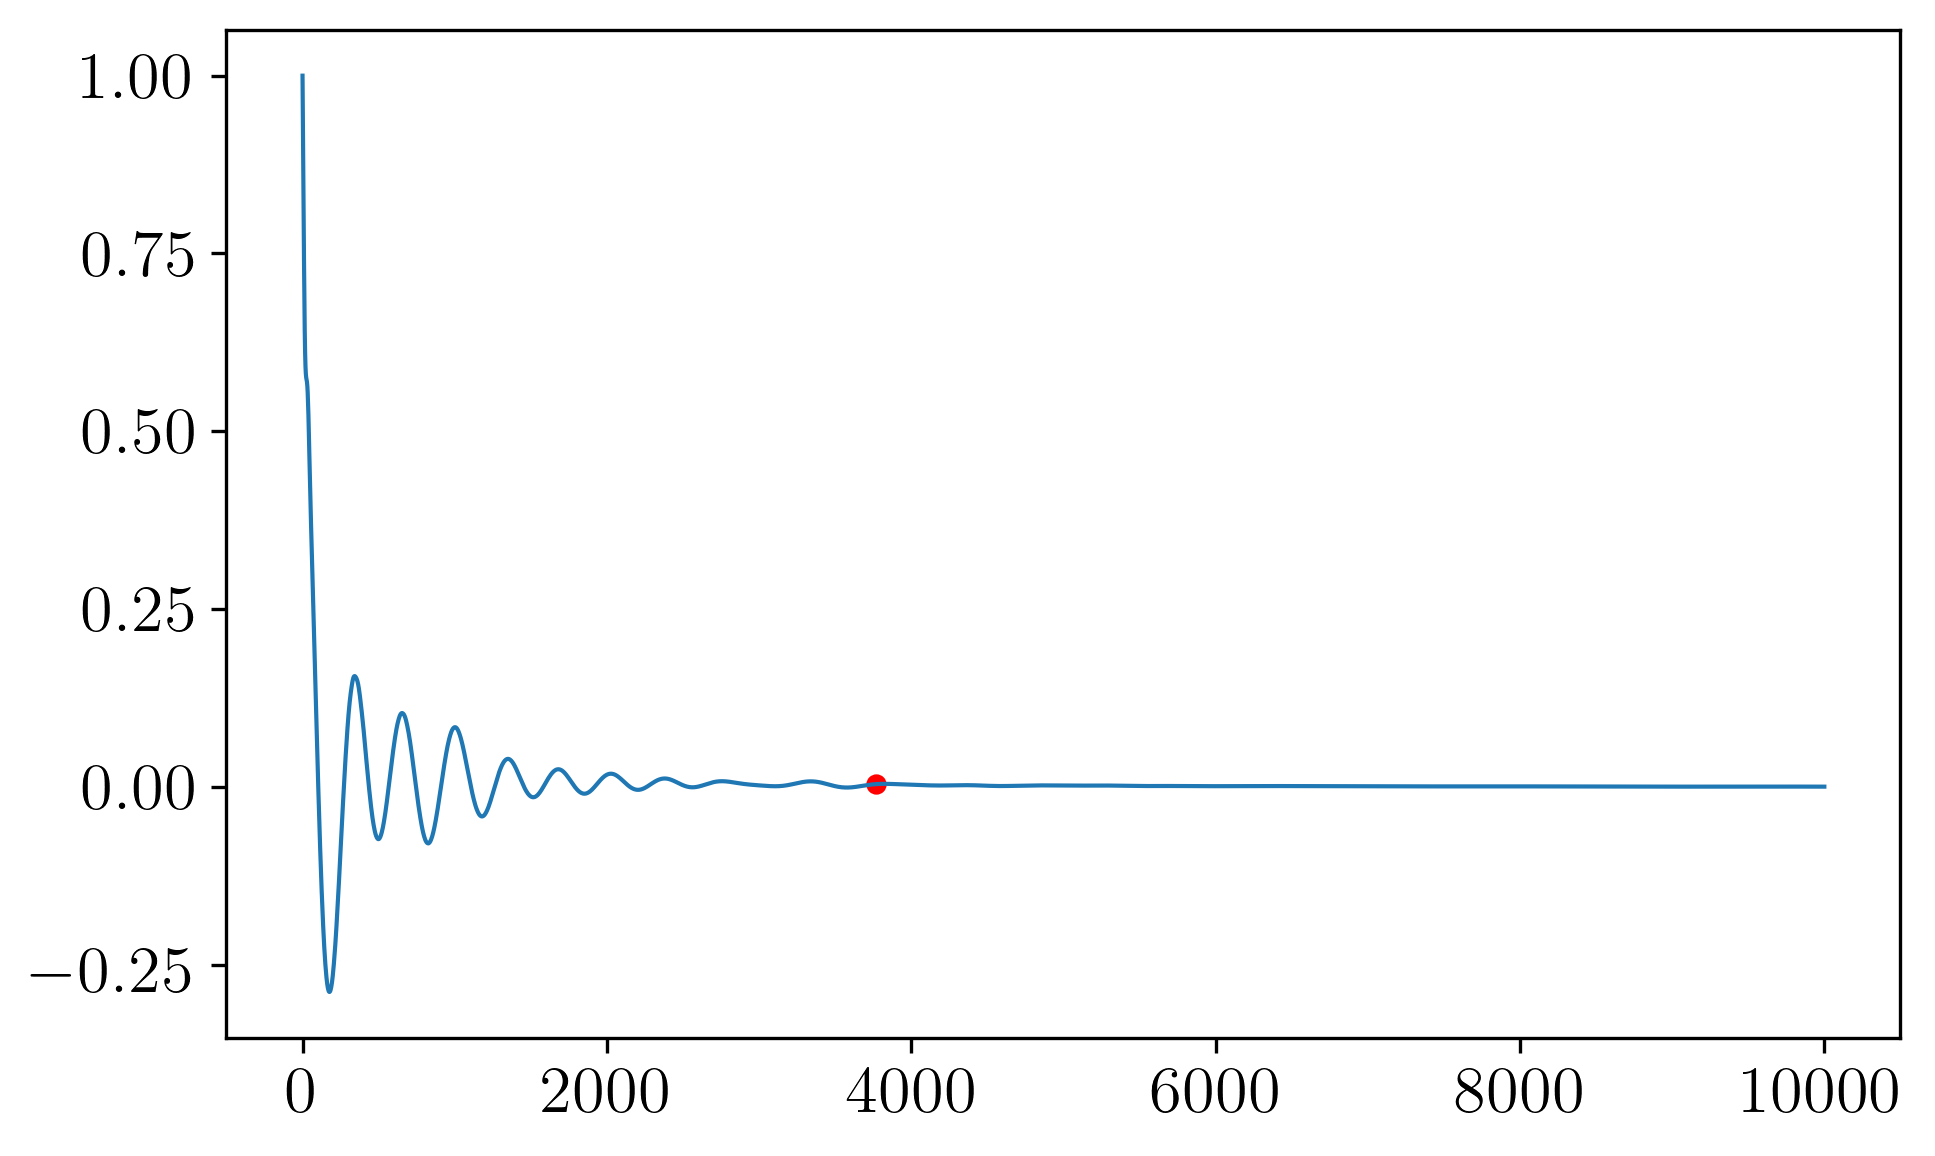

In [7]:
resplot()

/raven/u/cmor/jupyter/HP_project/data/LHD/surface
/raven/u/cmor/jupyter/HP_project/data/LHD/alpha_pi.10_npol_1


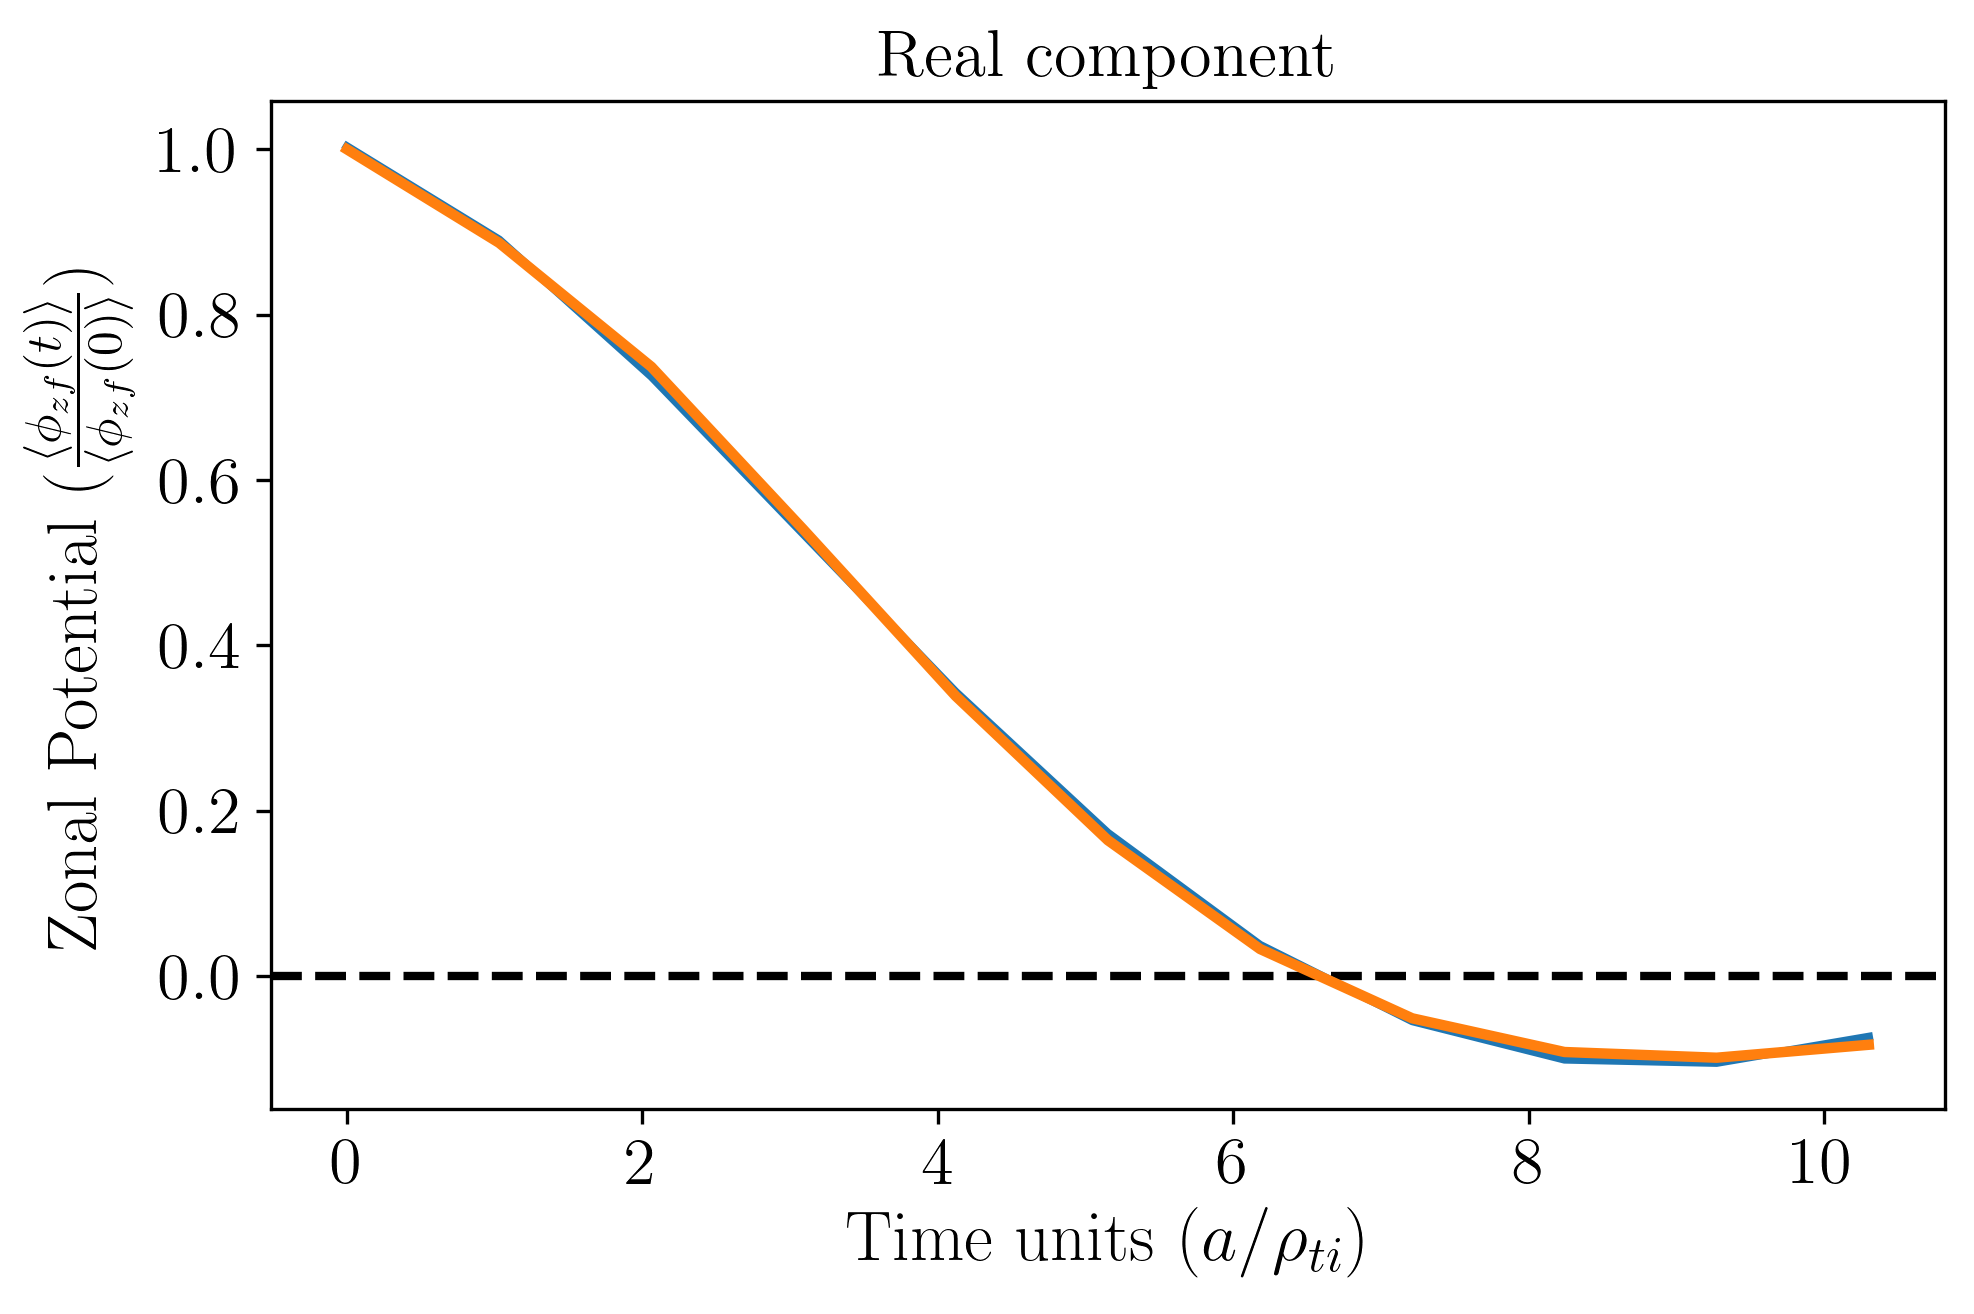

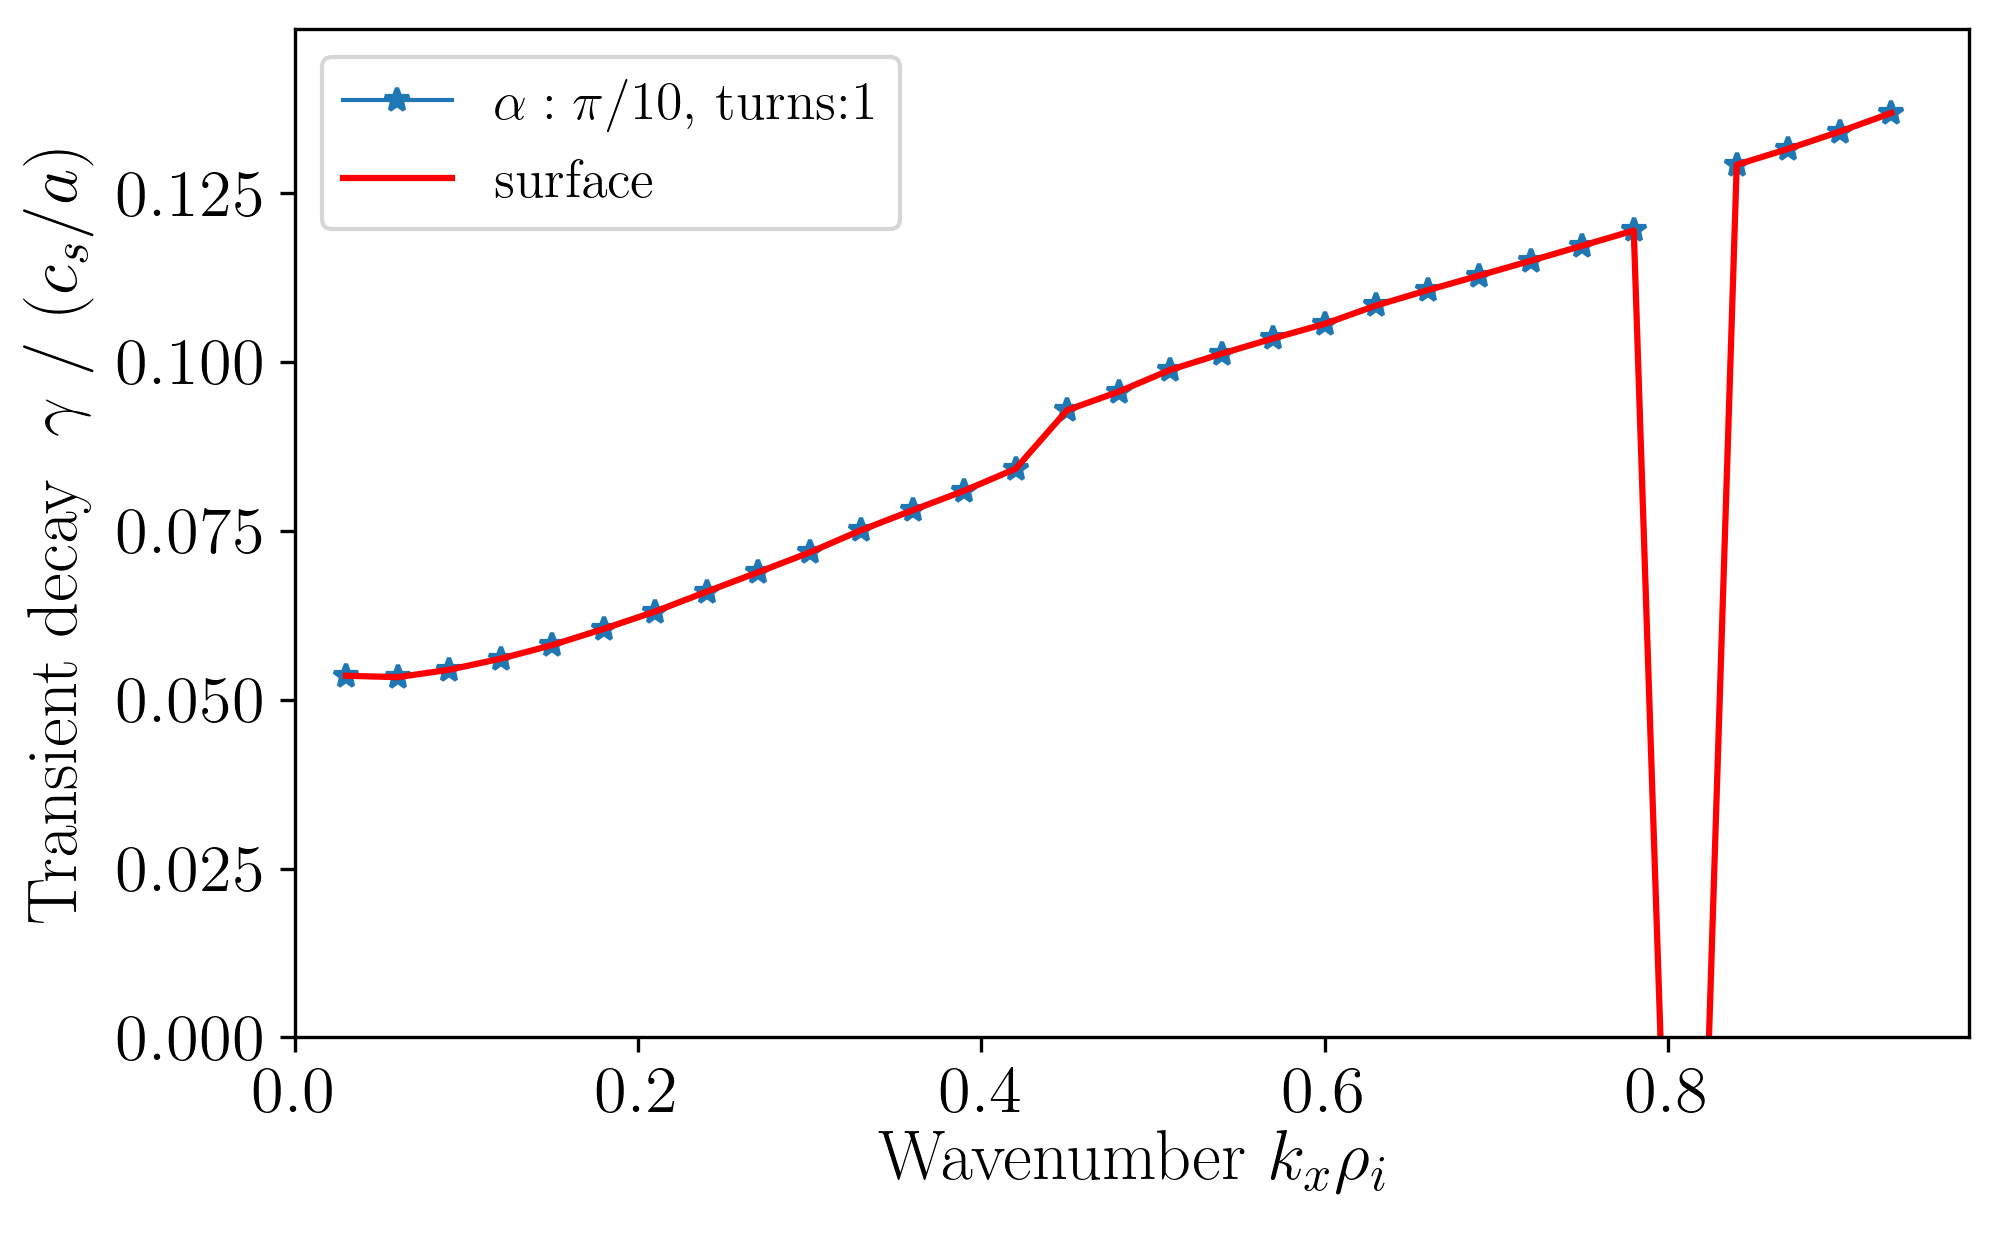

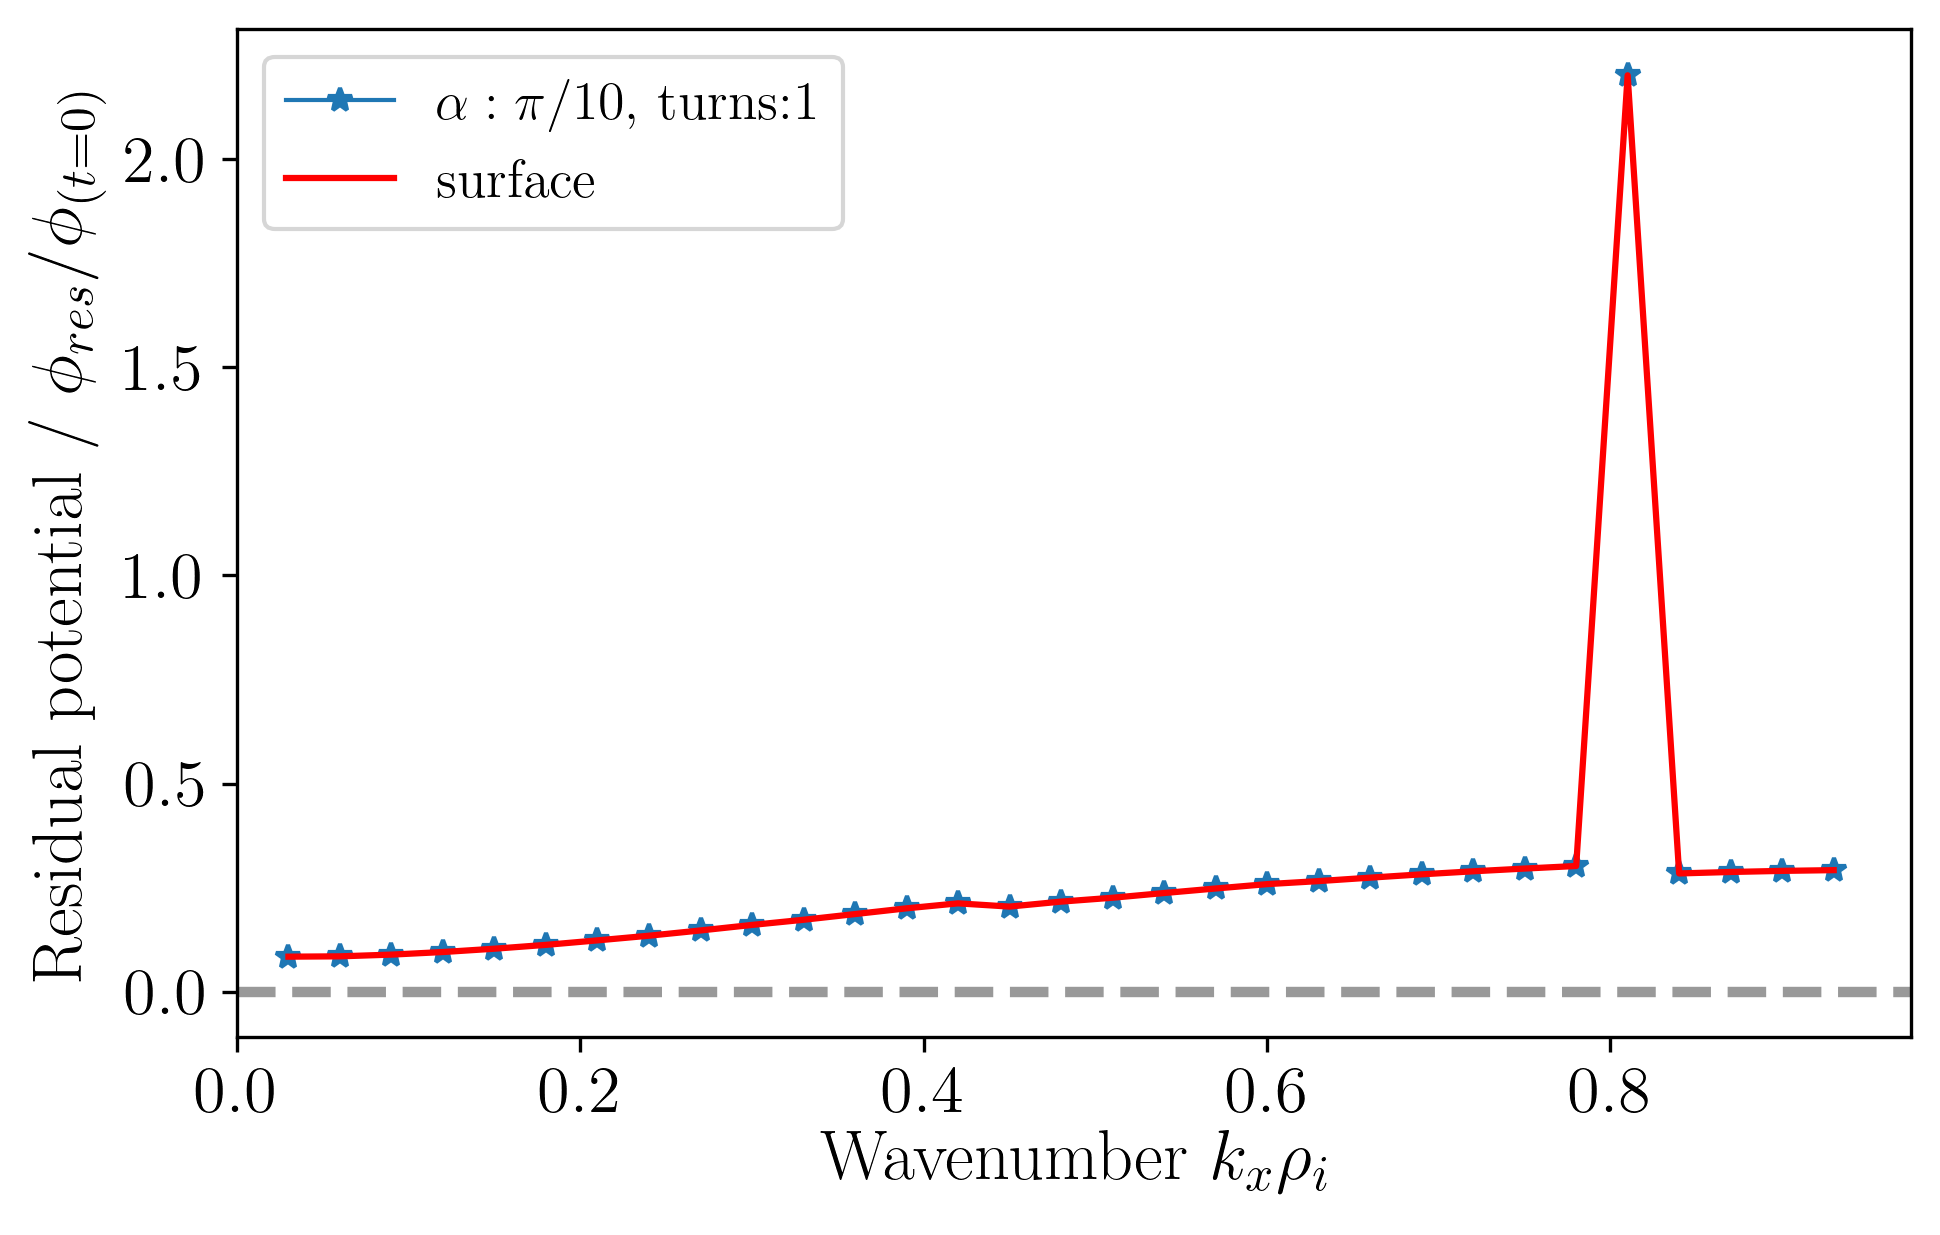

In [8]:
%run /u/cmor/jupyter/HP_project/main.ipynb
t0 = 0
tf = 11
res = 500

%cd /raven/u/cmor/jupyter/HP_project/data/LHD/surface
label   = "surface"
A, gamma_w7x_s, omega_w7x_s, d, res_w7x_s = transient_damping_scan(plot=None)

%cd /raven/u/cmor/jupyter/HP_project/data/LHD/alpha_pi.10_npol_1
label   = "alpha pi/10, npol 1"
A, gamma_10_1, omega_10_1, d, res_10_1 = transient_damping_scan(plot='real')

plt.figure()
plt.plot(kx, gamma_10_1, '-*', label=r"$\alpha:\pi / 10$, turns:1", linewidth=1)
plt.plot(kx, gamma_w7x_s, label=r"surface", linewidth=1.5, color='red')
plt.legend()
plt.xlabel(r"Wavenumber $k_{x} \rho_{i}$")
plt.ylabel(r"Transient decay  \ $\gamma \ / \ (c_{s} / a)$")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

plt.figure()
plt.plot(kx, res_10_1, '-*', label=r"$\alpha:\pi / 10$, turns:1", linewidth=1)
plt.plot(kx, res_w7x_s, label=r"surface", linewidth=1.5, color='red')
plt.legend()
plt.xlabel(r"Wavenumber $k_{x} \rho_{i}$")
plt.ylabel(r"Residual potential / $\phi_{res} / \phi_{(t=0)}$")
# plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.hlines(y=0, xmin=0, xmax=7, alpha=0.4, linestyle='dashed')
plt.show()

/raven/u/cmor/jupyter/HP_project/data/LHD/surface


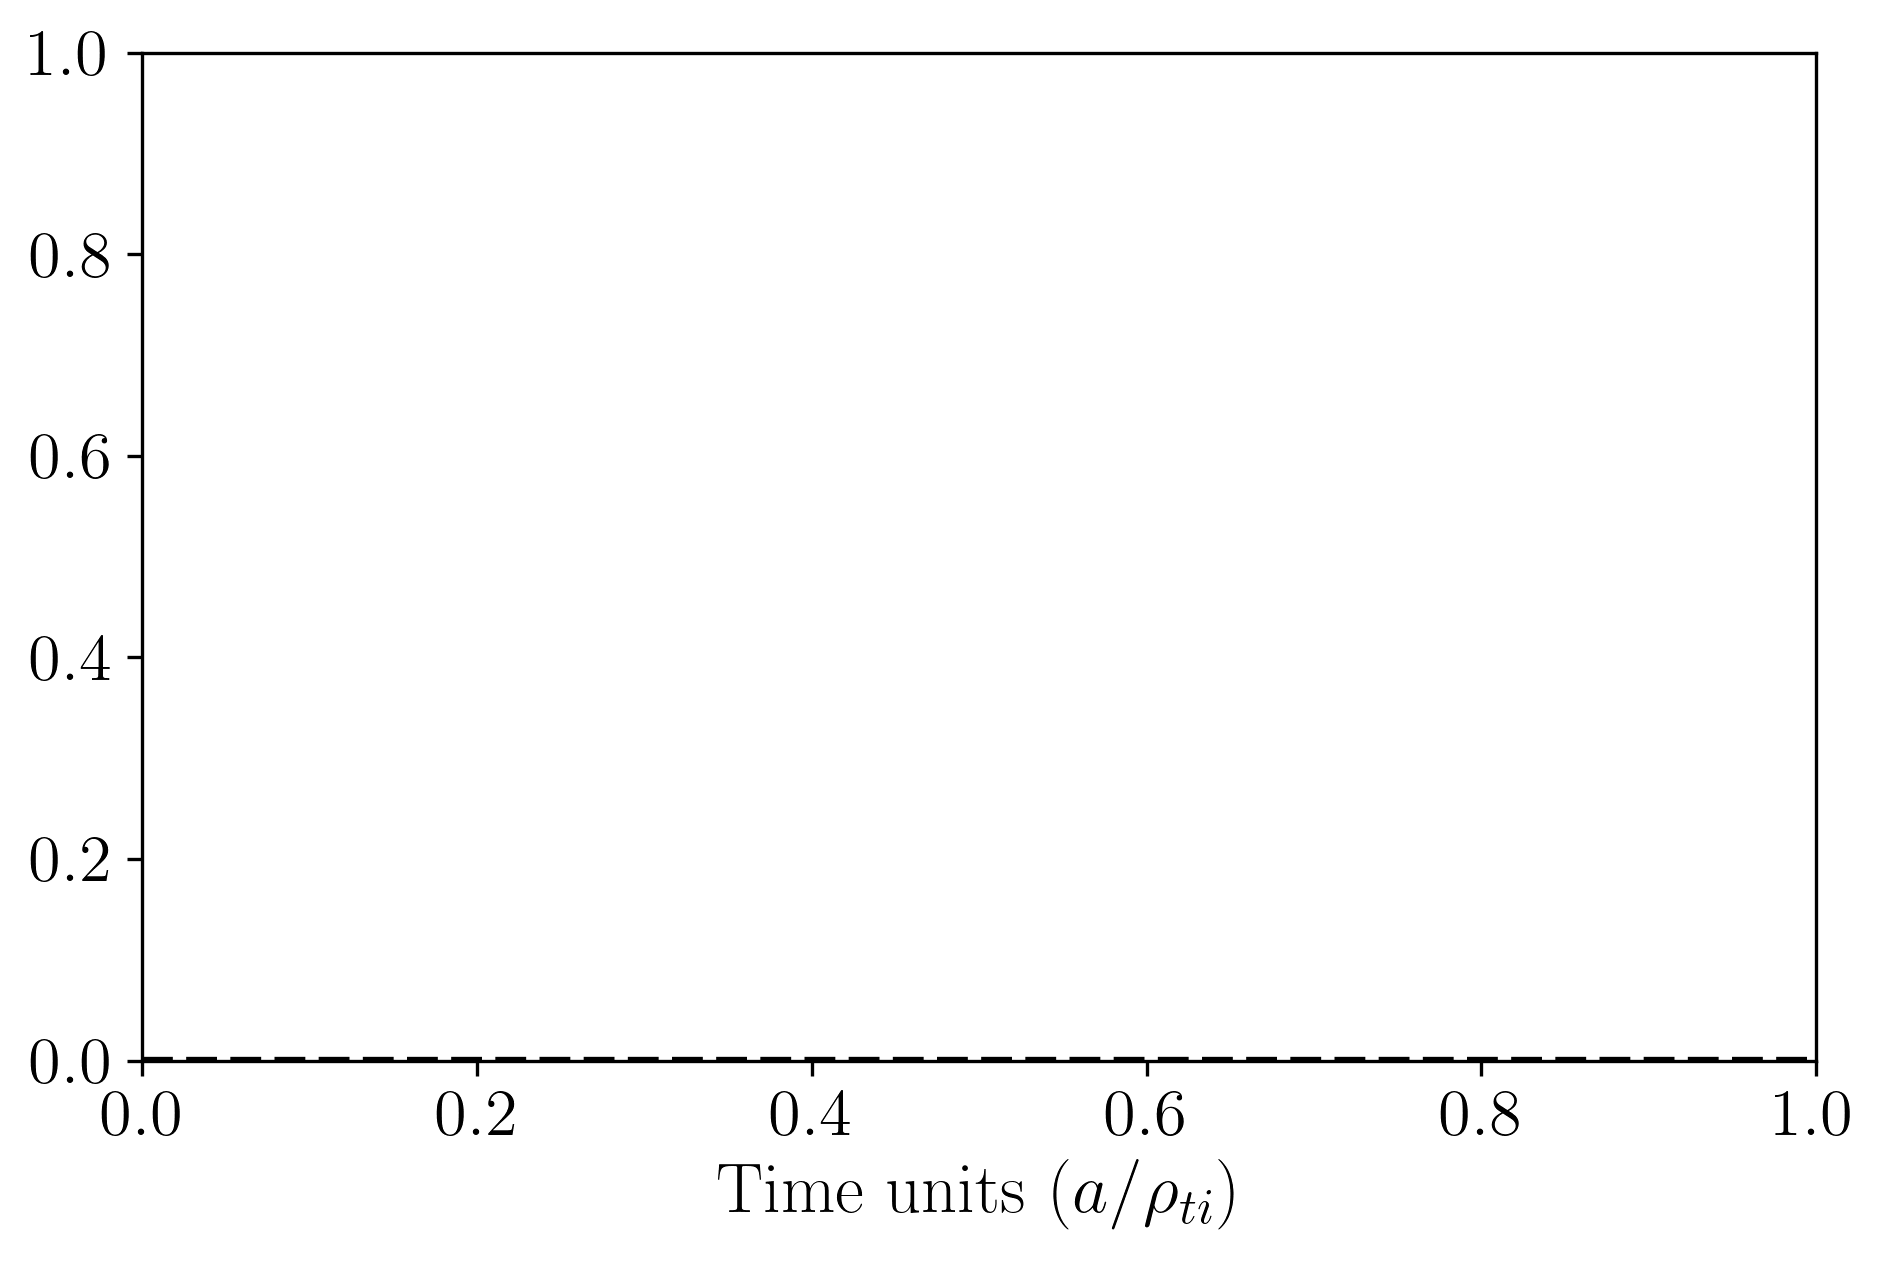

In [68]:
%run /u/cmor/jupyter/HP_project/main.ipynb
%cd /raven/u/cmor/jupyter/HP_project/data/LHD/surface
label   = "surface"
    
# Start plotting details, label and title
plt.figure()
plt.xlabel('Time units $(a/\\rho_{ti})$')
plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero

# End plotting details

gam = pylab.loadtxt("timetraceions_0001.dat")

E = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]), where=gam[0, 1] != 0)

t = gam[:, 0]  # Time

# Crop the time trace to the required values

a = 0.0114
b = 0.0624
c = 0.0003
d = 5.2270
e = 0.0029
g = 2.5570
k = 0.0516
m = 1.3910
r2 = []
res = []
tstep = []

for kekke in range(20, len(t), 10):

    y = E[:kekke]
    p = t[:kekke]

    gmodel = lmfit.Model(edi_2)

    pars = Parameters()
    pars.add('a', value=a)  # Residual
    pars.add('b', value=b)
    pars.add('c', value=c)
    pars.add('d', value=d)
    pars.add('e', value=e)  # decay
    pars.add('g', value=g)
    pars.add('k', value=k)
    pars.add('m', value=m)
    result = gmodel.fit(y, pars, t=p, nan_policy='propagate')
    r2 = np.append(r2, 1 - result.residual.var() / np.var(y))
    res = np.append(res, result.best_values.get("a"))
    tstep = np.append(tstep, p[-1])

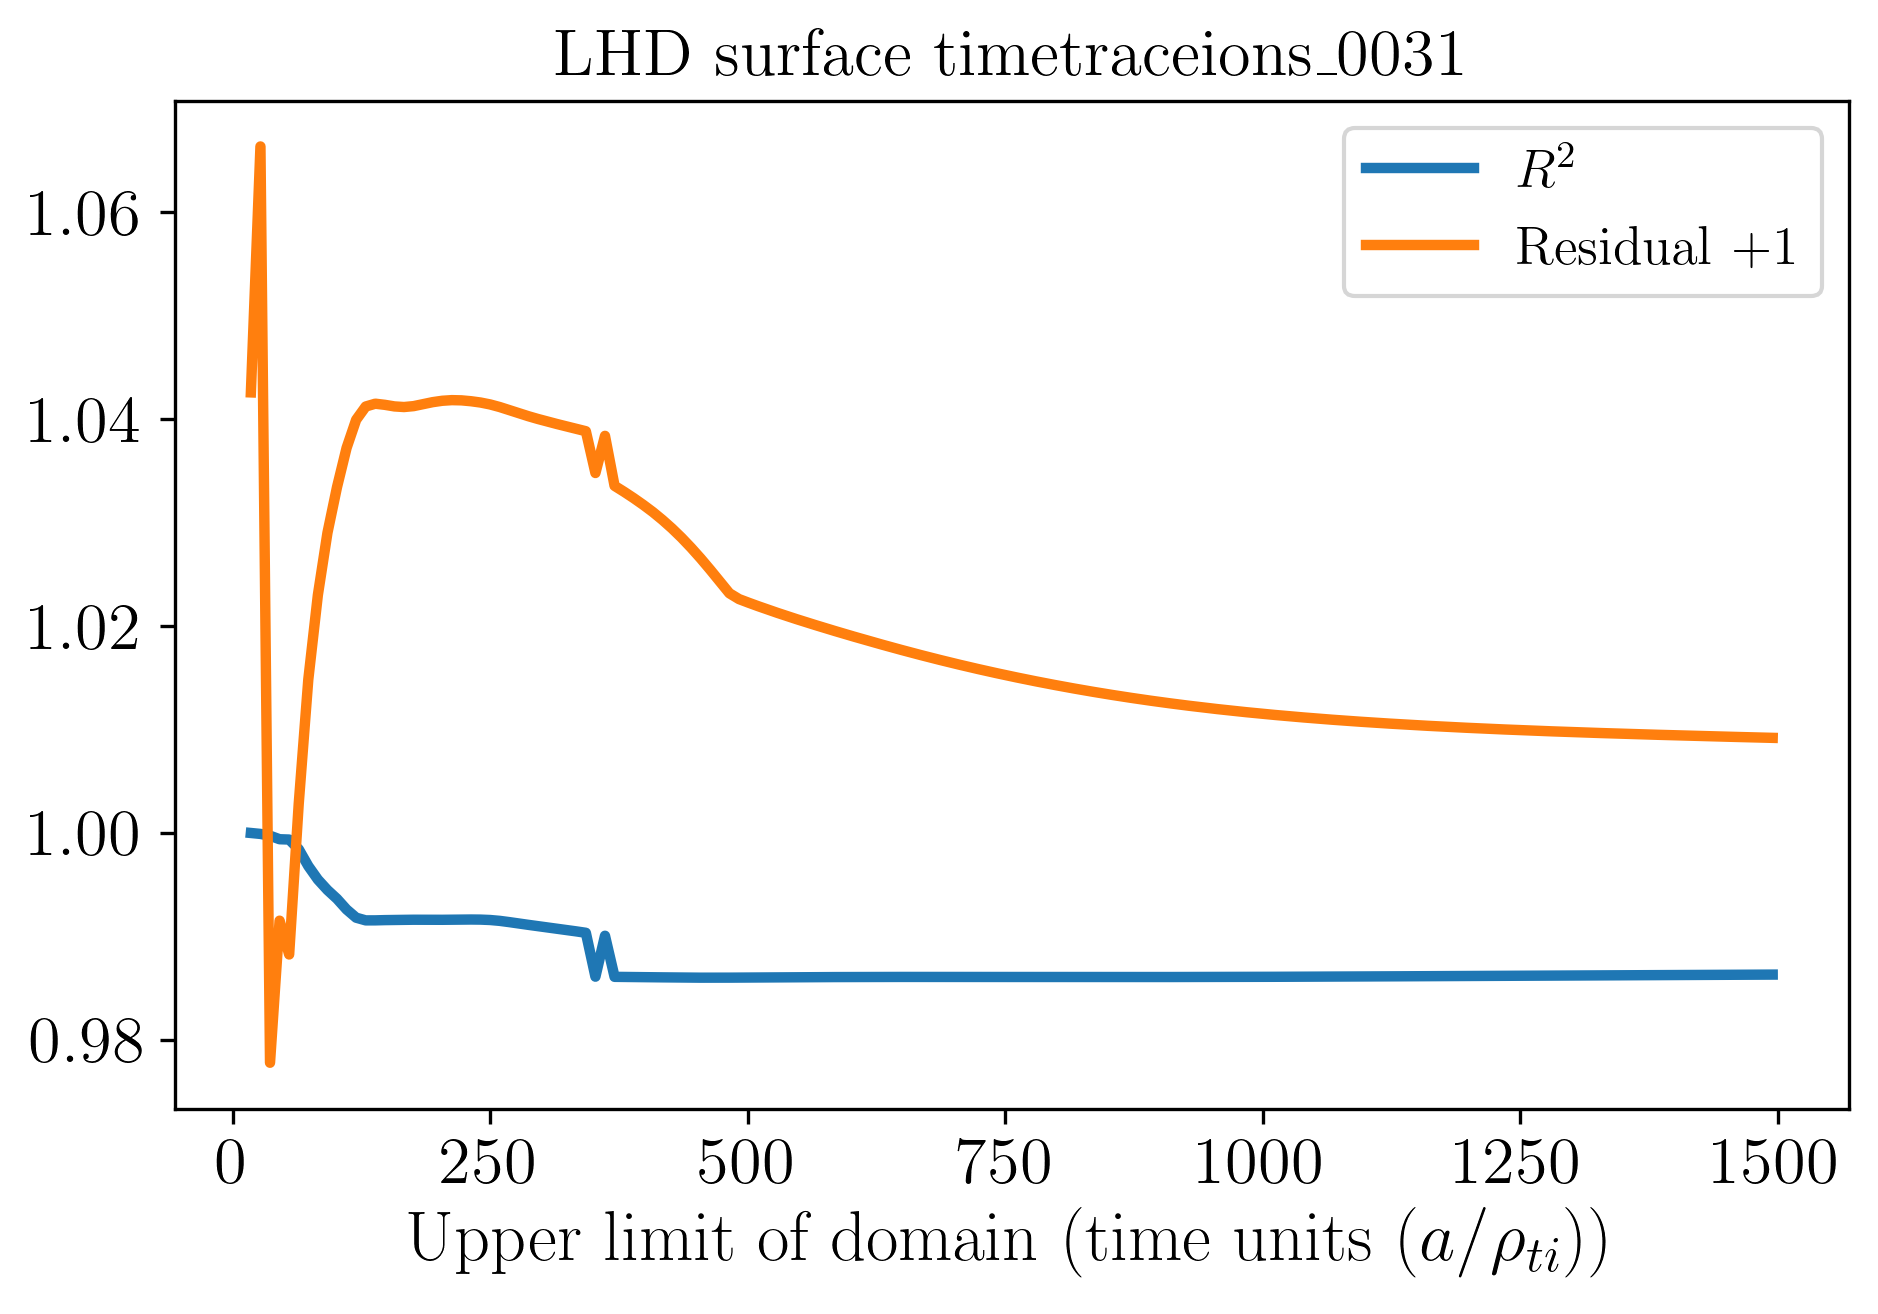

In [67]:
lhd_s_31_tstep = tstep
lhd_s_31_r2 = r2
lhd_s_31_res = res
plt.plot(lhd_s_31_tstep, lhd_s_31_r2, label=r"$R^{2}$")
plt.plot(lhd_s_31_tstep, lhd_s_31_res+1, label=r"Residual +1")
# plt.ylim(ymin=0.95)
# plt.xlim(xmin=0)
plt.title(r"LHD surface timetraceions\_0031")
plt.xlabel(r"Upper limit of domain (time units $(a/\rho_{ti})$)")
# plt.ylabel(r"$R^{2}$")
plt.legend()
plt.show()

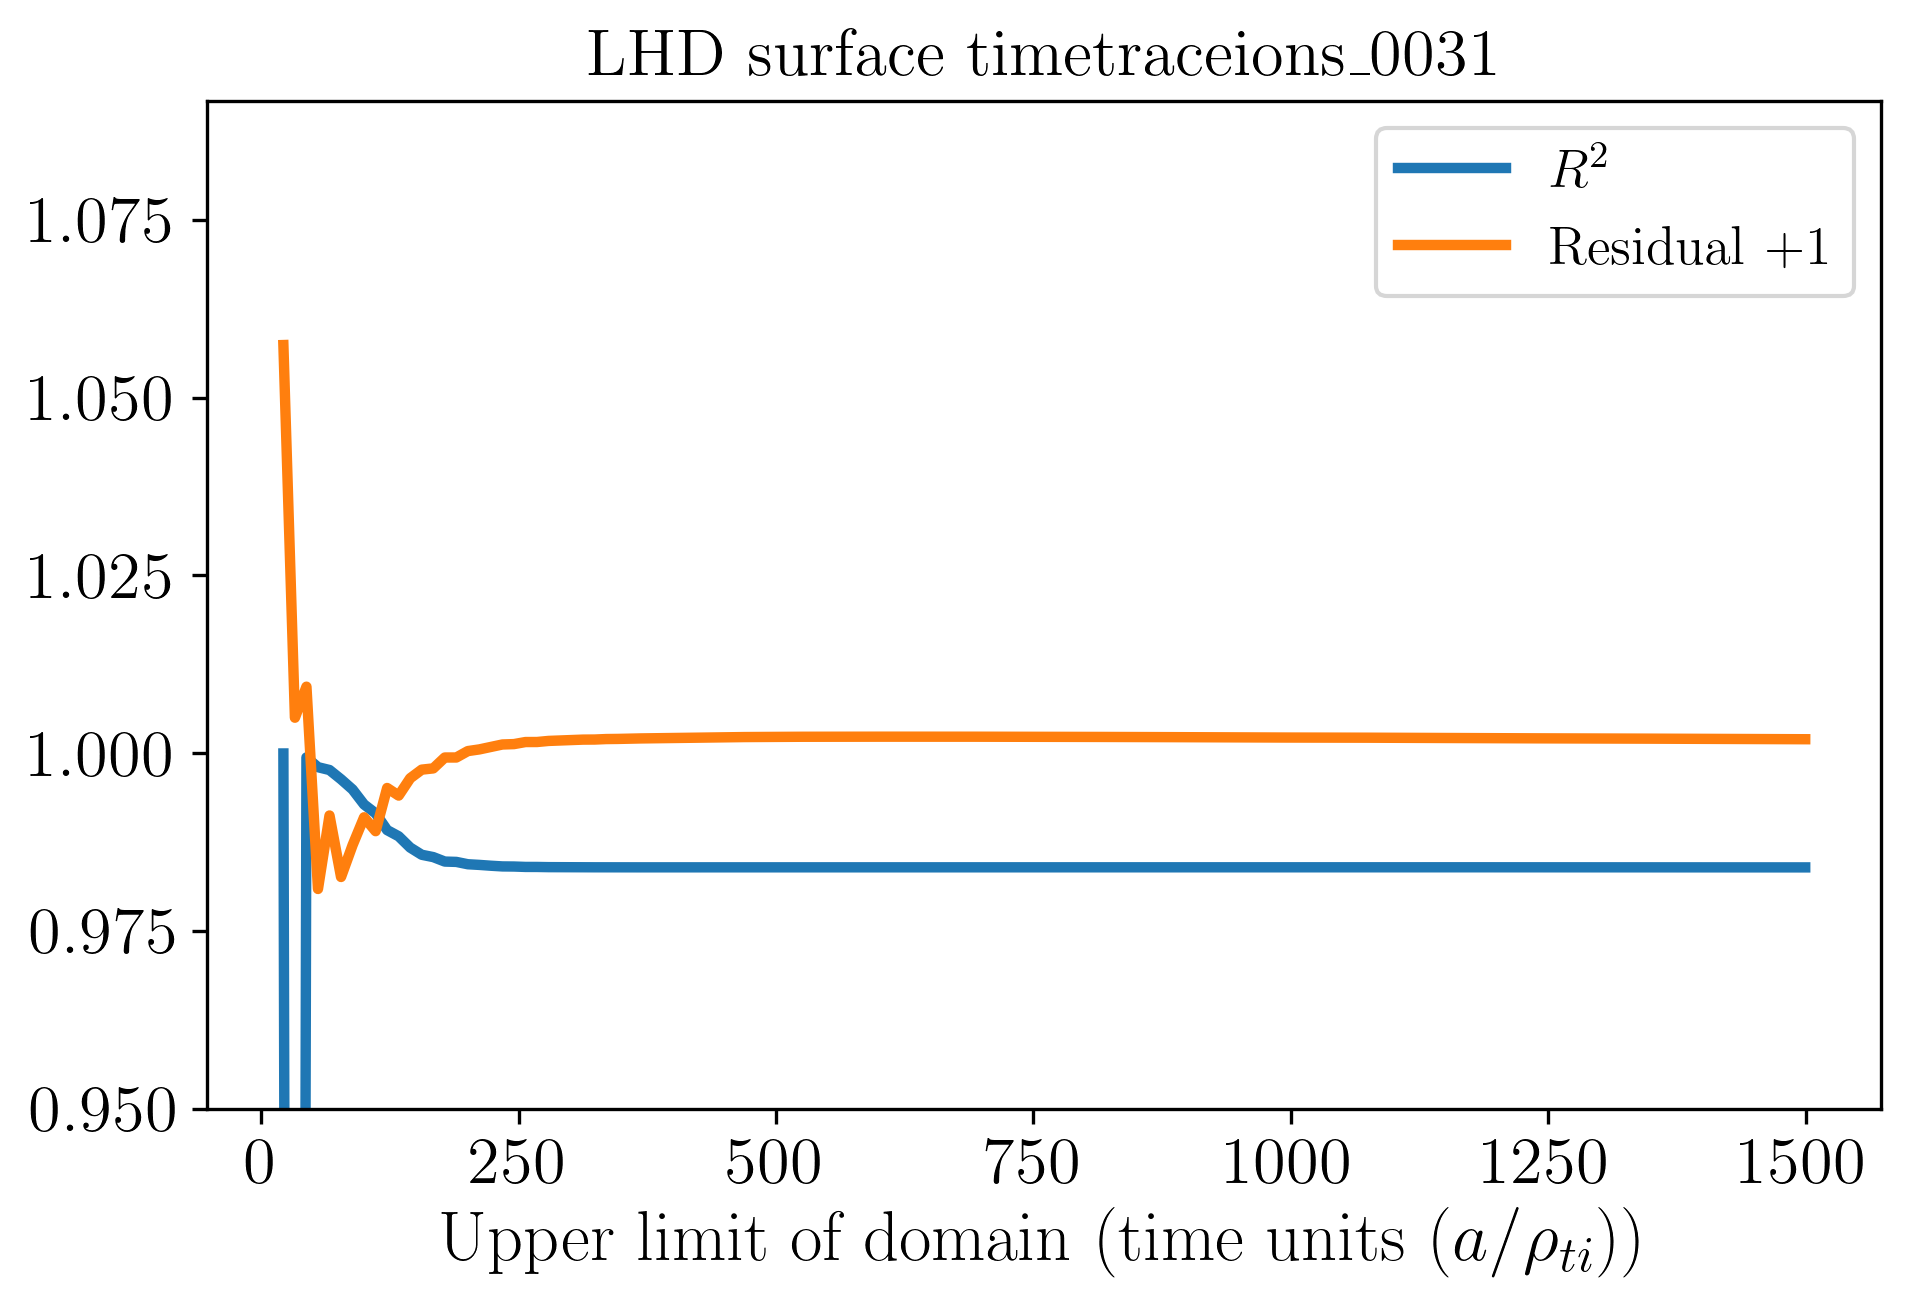

In [71]:
lhd_s_1_tstep = tstep
lhd_s_1_r2 = r2
lhd_s_1_res = res
plt.plot(lhd_s_1_tstep, lhd_s_1_r2, label=r"$R^{2}$")
plt.plot(lhd_s_1_tstep, lhd_s_1_res+1, label=r"Residual +1")
plt.ylim(ymin=0.95)
# plt.xlim(xmin=0)
plt.title(r"LHD surface timetraceions\_0031")
plt.xlabel(r"Upper limit of domain (time units $(a/\rho_{ti})$)")
# plt.ylabel(r"$R^{2}$")
plt.legend()
plt.show()